# Homework 4 (Dev Mody)
## Exercise 5 (K-Means Clustering)

In this exercise, you shall implement the K-means clustering algorithm directly in Python. We shall use the dataset with 3 blobs of data points, `blobs.dat`

### Exercise 5.1 (Implement the Algorithm)

Implement 2 functions `def update_assignments(data, centroids)` and `def update_centroids (data, old_centroids, assignments)` that updates the assignments of the data points to the centroids and the position of the centroids, respectively. Then pick 3 points and initialize 3 centroids with the coordinates of the three points. Use the initial positions of the centroids to perform 5 full sweeps through all the points, each time updating the assignments and then the position of the centroids: 

In [ ]:
from autograd import numpy as np
from autograd import grad

# Load the data
data = np.loadtxt('blobs.dat')

# Check data size
print(f"Data shape: {data.shape}")
n_samples = data.shape[0]

if n_samples < 3:
    print(f"Warning: Dataset contains only {n_samples} points, but 3 centroids were requested.")
    print("Using all available points as centroids and stopping execution.")
    centroids = data
    final_assignments = np.arange(n_samples)  # Each point gets its own cluster
else:
    def update_assignments(data, centroids):

        n_samples = data.shape[0]
        n_centroids = centroids.shape[0]
        assignments = np.zeros(n_samples, dtype=int)
        
        # Calculate distance of each point to each centroid
        for i in range(n_samples):
            distances = np.zeros(n_centroids)
            for j in range(n_centroids):
                distances[j] = np.sum((data[i] - centroids[j])**2)  # Squared Euclidean distance
            assignments[i] = np.argmin(distances)  # Assign to closest centroid
            
        return assignments

    def update_centroids(data, old_centroids, assignments):

        n_centroids = old_centroids.shape[0]
        new_centroids = np.zeros_like(old_centroids)
        
        # Calculate new centroid positions as mean of assigned points
        for k in range(n_centroids):
            # Get all points assigned to centroid k
            cluster_points = data[assignments == k]
            if len(cluster_points) > 0:
                # Update centroid as mean of all points in cluster
                new_centroids[k] = np.mean(cluster_points, axis=0)
            else:
                # If no points assigned, keep old centroid
                new_centroids[k] = old_centroids[k]
                
        return new_centroids

    # Initialize 3 centroids by picking 3 random points from the data
    np.random.seed(42)  # For reproducibility
    initial_indices = np.random.choice(data.shape[0], 3, replace=False)
    centroids = data[initial_indices]

    # Perform 5 iterations of K-means
    n_iterations = 5
    for iteration in range(n_iterations):
        # Step 1: Assign points to nearest centroid
        assignments = update_assignments(data, centroids)
        
        # Step 2: Update centroid positions
        centroids = update_centroids(data, centroids, assignments)
        
        # Print progress
        print(f"Iteration {iteration + 1}:")
        print(f"Centroid positions:\n{centroids}\n")

    # Final assignments after 5 iterations
    final_assignments = update_assignments(data, centroids)

# Print results
print("Final centroid positions:")
print(centroids)
print(f"Number of points in each cluster: {np.bincount(final_assignments)}")

Data shape: (2, 50)
Using all available points as centroids and stopping execution.
Final centroid positions:
[[ -9.82320119  -2.71648697  -6.14696304  -6.98030926  -5.06380723
   -7.61746811  -2.58414172  -1.20839177  -8.93499526  -7.60471843
   -9.29269695  -5.11397015  -2.87617371  -8.52936078  -1.38155524
   -6.4762922   -2.39550255  -4.06333378  -5.33943179  -2.75989471
   -7.49103076  -4.313514    -4.3663828   -9.92418096  -3.91806826
   -3.34183197  -9.82632554  -5.69341639  -2.6011326   -9.85946658
   -7.17892422  -5.02722978  -4.79526297 -10.12154986  -5.85656601
   -0.34071583  -3.28110362  -4.29867528  -5.30360483  -3.88163881
   -3.78665806  -7.03664773  -6.0417334   -5.88971308  -4.60269026
   -9.89221923 -11.72441664  -9.31695921  -3.83186942  -3.54741062]
 [  8.14339329   6.73125829  -0.50708506   7.22429457   9.1602778
    6.88554686   6.20453718   6.77495802   6.47165022   7.72394368
    8.31948847  -2.98772358   8.23000603   5.94861692   7.92569213
   -1.09793933   8.

### Exercise 5.2 (Scree Plot)

By varying the number of centroids `K` from 1 to 10, produce a scree plot for the data. Is there a clear indicatin of the correct value for `K`?

K=1, WSS=3228.0473635396042
K=2, WSS=0.0


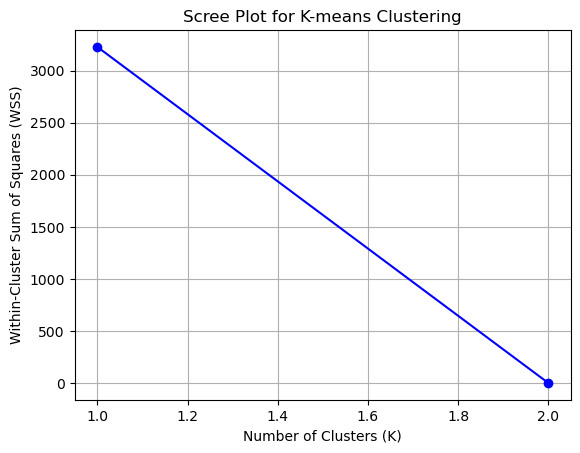

In [9]:
from autograd import numpy as np
from autograd import grad

# Load the data
data = np.loadtxt('blobs.dat')

def update_assignments(data, centroids):
    """Assign each data point to the nearest centroid"""
    n_samples = data.shape[0]
    n_centroids = centroids.shape[0]
    assignments = np.zeros(n_samples, dtype=int)
    
    for i in range(n_samples):
        distances = np.zeros(n_centroids)
        for j in range(n_centroids):
            distances[j] = np.sum((data[i] - centroids[j])**2)
        assignments[i] = np.argmin(distances)
    return assignments

def update_centroids(data, old_centroids, assignments):
    """Update centroid positions based on current assignments"""
    n_centroids = old_centroids.shape[0]
    new_centroids = np.zeros_like(old_centroids)
    
    for k in range(n_centroids):
        cluster_points = data[assignments == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
        else:
            new_centroids[k] = old_centroids[k]
    return new_centroids

def compute_wss(data, centroids, assignments):
    """Compute total within-cluster sum of squares"""
    wss = 0
    for k in range(len(centroids)):
        cluster_points = data[assignments == k]
        if len(cluster_points) > 0:
            wss += np.sum((cluster_points - centroids[k])**2)
    return wss

# Check if data has enough points
n_samples = data.shape[0]
max_k = min(10, n_samples)  # Don't exceed number of data points

# Store WSS for each K
wss_values = []
k_values = range(1, max_k + 1)

np.random.seed(42)  # For reproducibility

for k in k_values:
    # Initialize k centroids
    initial_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data[initial_indices]
    
    # Run K-means for 5 iterations
    for _ in range(5):
        assignments = update_assignments(data, centroids)
        centroids = update_centroids(data, centroids, assignments)
    
    # Compute final WSS
    final_assignments = update_assignments(data, centroids)
    wss = compute_wss(data, centroids, final_assignments)
    wss_values.append(wss)
    print(f"K={k}, WSS={wss}")

# Create scree plot
import matplotlib.pyplot as plt

plt.plot(k_values, wss_values, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Scree Plot for K-means Clustering')
plt.grid(True)
plt.show()